# Vanna Tutorial

## Import packages

In [1]:
# Install Vanna, if necessary
%pip install vanna

# Import packages
import pandas as pd
import vanna as vn

## Get credentials

In [2]:
# Create login and get API key
api_key = vn.get_api_key('jcanalesluna@gmail.com') 
vn.set_api_key(api_key)

Check your email for the code and enter it here:  UYI7KT


ifeiwfew

## Choosing models

In [7]:
# Create models
vn.create_model(model="data_wharehose", db_type="Snowflake")
vn.create_model(model="marketing_db", db_type="Postgres")

True

In [5]:
vn.get_models()


['data_wharehose',
 'marketing_db',
 '',
 'my-dataset2',
 'demo-tpc-h',
 'tpc',
 'chinook',
 'my-shipments',
 'my-shipments',
 'my-shipments',
 'my-shipments',
 'my-shipments',
 'my-shipments',
 'ralph-model-1',
 'ralph-model-1',
 'ralph-model-1',
 'ralph-model-1',
 'ralph-model-1']

In [3]:
# Set the model 
vn.set_model('chinook')

# Connect to database
url= 'https://github.com/lerocha/chinook-database/raw/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite'
vn.connect_to_sqlite(url=url)

## Inspecting training data

In [19]:
# Check training data
training_data = vn.get_training_data()
training_data

/Users/javiercanalesluna/venv/vanna/lib/python3.9/site-packages/vanna/__init__.py:1513: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(training_data.data)


,id,training_data_type,question,content
0,2174-sql,sql,"For each artist, check if any employee has the...","SELECT a.name as artist_name,\n case whe..."
1,4077-sql,sql,Cuales son los países con mas población?,"SELECT name,\n population\nFROM world\..."
2,24-ddl,ddl,None,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...
3,4082-sql,sql,Muestrame los países con mas población de cada...,"SELECT continent,\n name,\n popula..."
4,4208-sql,sql,que empleado vendió más discos y comparalo con...,"with sales as (SELECT e.employeeid,\n ..."
...,...,...,...,...
138,4075-sql,sql,What are the top 10 'name' and 'population' co...,"SELECT name,\n population\nFROM world\..."
139,1832-sql,sql,Which genre had the highest total sales?,"SELECT g.name,\n sum(il.quantity) as tot..."
140,1794-sql,sql,What is the total number of sales?,SELECT count(*) as total_sales\nFROM invoice;
141,4306-sql,sql,Do you have sales in South Korea??,SELECT count(*) as total_sales\nFROM invoice...


In [20]:
# Add question-query pair
vn.add_sql(
    question="Which are the five top stores by sales?",
    sql="""SELECT BILLINGCITY, SUM(TOTAL) 
        FROM INVOICE 
        GROUP BY 1 
        ORDER BY 2 DESC 
        LIMIT 5;"""
        )

False

## Asking questions

SELECT a.name,
       sum(il.quantity) as total_sales
FROM   artist a
    INNER JOIN album al
        ON a.artistid = al.artistid
    INNER JOIN track t
        ON al.albumid = t.albumid
    INNER JOIN invoiceline il
        ON t.trackid = il.trackid
    INNER JOIN genre g
        ON t.genreid = g.genreid
WHERE g.name = 'Jazz'
GROUP BY a.name
ORDER BY total_sales DESC
LIMIT 5;


,Name,total_sales
0,Spyro Gyra,20
1,Miles Davis,17
2,Gene Krupa,17
3,Incognito,9
4,Antônio Carlos Jobim,7


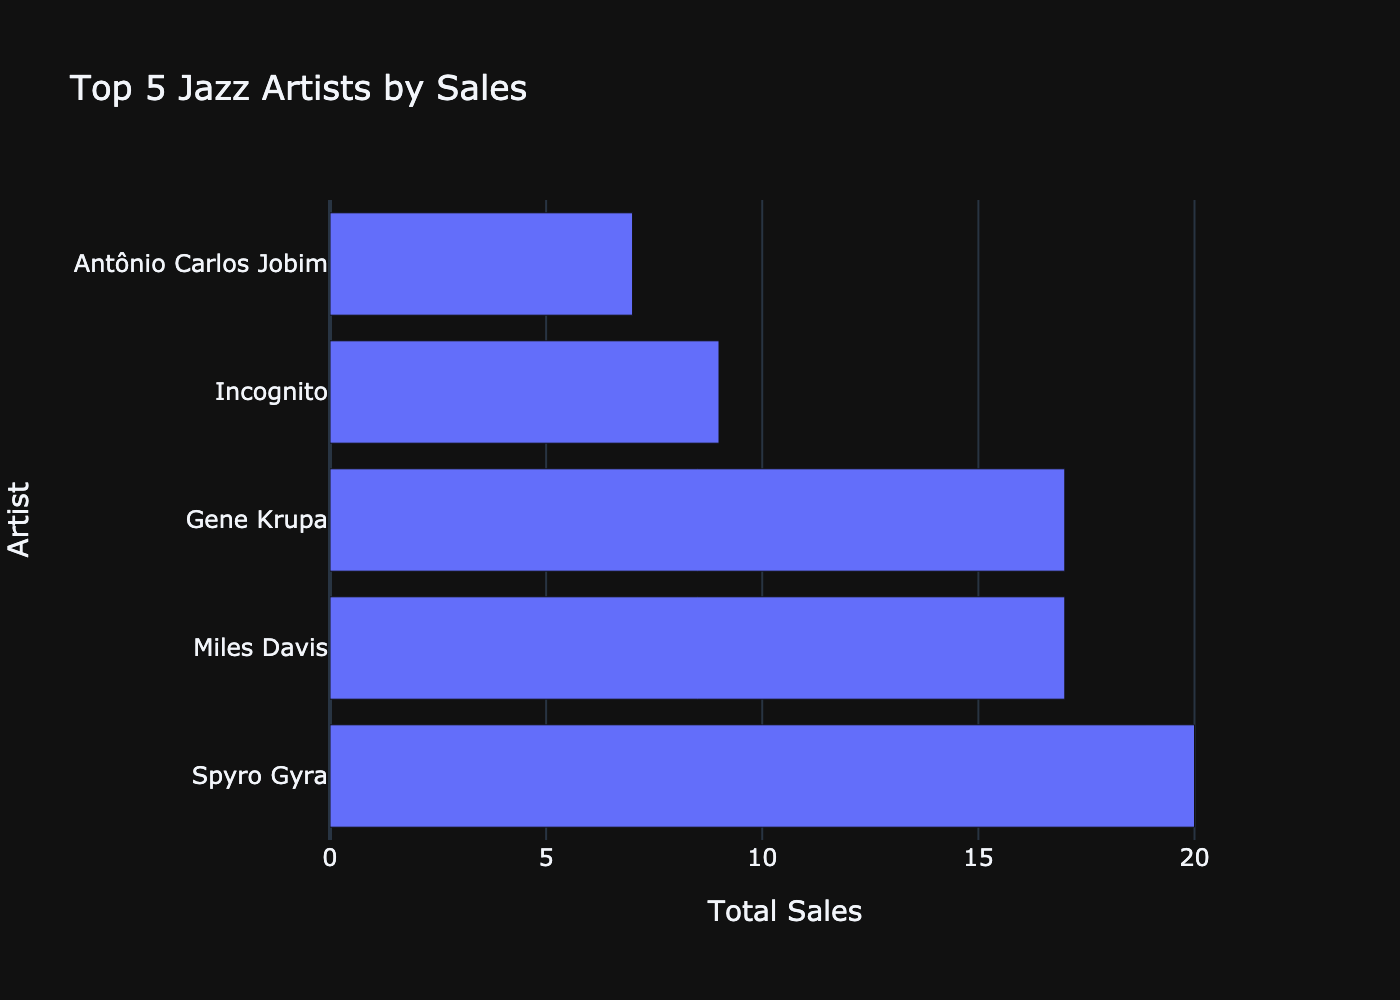

AI-generated follow-up questions:

* - What are the top 5 jazz albums by sales?
* - Who are the top 5 jazz artists by total revenues?
* - Which jazz genre has the highest sales?
* - What are the top 5 tracks in the jazz genre by sales?
* - Which jazz artist has the highest average sales per album?
* - What are the top 5 jazz artists with the most tracks sold?
* - What is the total sales revenue for all jazz tracks?
* - What are the top 5 jazz tracks with the highest unit price?
* - What are the top 5 customers who purchased jazz music?
* - What is the overall sales trend for jazz music?
* - What are the top 5 countries with the highest sales of jazz music?
* - What are the top 5 jazz artists with the highest number of albums?
* - What are the top 5 jazz artists with the highest average unit price?
* - What are the top 5 jazz albums with the highest average unit price?
* - What are the top 5 jazz tracks with the longest duration?


In [20]:
vn.ask("What are the top 5 jazz artists by sales?")


In [40]:
# Save results in variables
sql, df, fig, followup_questions = vn.ask(question="What are the top 5 jazz artists by sales?", print_results=False)


In [44]:
# Save docs
df.to_csv('top_jazz_artists.csv', index=False)
fig.write_image("top_jazz_artists.png")

In [36]:
# Check training data
training_data = vn.get_training_data()
training_data['question'].str.contains('What are the top 5 jazz artists by sales?').any()


/Users/javiercanalesluna/venv/vanna/lib/python3.9/site-packages/vanna/__init__.py:1513: FutureWarning:

Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



True

In [39]:
vn.ask(question='Who is the oldest employee')

SELECT *
FROM employee
ORDER BY BirthDate ASC
LIMIT 1;


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com


Couldn't run plotly code:  
    Invalid value of type 'builtins.str' received for the 'reference' property of indicator.delta
        Received value: '1947-09-19 00:00:00'

    The 'reference' property is a number and may be specified as:
      - An int or float


Traceback (most recent call last):
  File "/Users/javiercanalesluna/venv/vanna/lib/python3.9/site-packages/vanna/__init__.py", line 1229, in ask
    fig = get_plotly_figure(plotly_code=plotly_code, df=df)
  File "/Users/javiercanalesluna/venv/vanna/lib/python3.9/site-packages/vanna/__init__.py", line 1348, in get_plotly_figure
    exec(plotly_code, globals(), ldict)
  File "<string>", line 4, in <module>
  File "/Users/javiercanalesluna/venv/vanna/lib/python3.9/site-packages/plotly/graph_objs/_indicator.py", line 1018, in __init__
    self["delta"] = _v
  File "/Users/javiercanalesluna/venv/vanna/lib/python3.9/site-packages/plotly/basedatatypes.py", line 4865, in __setitem__
    self._set_compound_prop(prop, value)
  File "/Users/javiercanalesluna/venv/vanna/lib/python3.9/site-packages/plotly/basedatatypes.py", line 5276, in _set_compound_prop
    val = validator.validate_coerce(val, skip_invalid=self._skip_invalid)
  File "/Users/javiercanalesluna/venv/vanna/lib/python3.9/site-package